In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Inserting Hazard Index 

In [5]:
file_path = '../data/raw/BMMS_overview.xlsx'  # Update this path to your file's location
df = pd.read_excel(file_path)

# Define the hazard level ranges based on the district (from the 'zone' column)
hazard_ranges = {
    "Barisal": (5.5, 6.7),
    "Chattogram": (5.2, 6.3),
    "Dhaka": (5.2, 6.0),
    "Khulna": (5.4, 6.5),
    "Mymensingh": (5.7, 6.0),
    "Sylhet": (5.7, 6.2),
    "Rajshahi": (5.6, 6.1),
    "Rangpur": (5.4, 6.1),
    "Cumilla": (5.1, 5.8),
    "Gopalganj": (5.0, 5.1)
}

# Function to generate random hazard level within the specified range
def get_hazard_level(zone):
    range = hazard_ranges.get(zone)
    if range:
        return np.random.uniform(range[0], range[1])
    else:
        return np.nan  # If the zone is not listed in the ranges, return NaN

# Apply the function to generate the 'hazard level' column
df['Hazard Level'] = df['zone'].apply(get_hazard_level)

# Adding the 'Hazard Index' column, each value is the 'hazard level' divided by 10
df['Hazard Index'] = df['Hazard Level'] / 10


In [6]:
df.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,Hazard Level,Hazard Index
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate,5.802892,0.580289
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate,5.717903,0.571790
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,...,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate,5.478539,0.547854
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,...,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate,5.916498,0.591650
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,...,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate,5.580537,0.558054


### Inserting Infrastructure Vulnerability Index

In [7]:
# Adding the 'Infrastructure Vulnerability Index' column. 
df['Infrastructure Vulnerability Index'] = (df['Hazard Index'] * df['length']) / (df['km'] * 1000)


### Inserting Vulnerability Score

In [8]:
# Adding the 'Vulnerability Index' column
df['Vulnerability Score'] = np.sqrt((1 - df['Hazard Index']) * df['Infrastructure Vulnerability Index'])

In [9]:
df.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,circle,division,sub-division,lat,lon,EstimatedLoc,Hazard Level,Hazard Index,Infrastructure Vulnerability Index,Vulnerability Score
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate,5.802892,0.580289,0.003643,0.039102
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate,5.717903,0.571790,0.000766,0.018114
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,...,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate,5.478539,0.547854,0.024062,0.104305
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,...,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate,5.916498,0.591650,0.000343,0.011828
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,...,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate,5.580537,0.558054,0.000323,0.011941


In [10]:
#see range of vulnerability score
df['Vulnerability Score'].describe()

count    15004.000000
mean         0.018313
std          0.036242
min          0.000912
25%          0.005613
50%          0.010032
75%          0.019898
max          1.683317
Name: Vulnerability Score, dtype: float64

### Add Vulnerability Category

In [15]:
# Adding the 'Vulnerability Category' column based on 'Vulnerability Index' classification
def classify_vulnerability(index):
    if 0 <= index <= 0.01:
        return 'High'
    elif 0.01 < index <= 0.02:
        return 'Medium'
    elif index > 0.02:
        return 'Low'
    else:
        return 'Undefined'  # In case there are any unexpected values

# Apply the classification function to the 'Vulnerability Index' column
df['Vulnerability Category'] = df['Vulnerability Score'].apply(classify_vulnerability)

# Save the updated dataframe to a new Excel file
output_path = '../model/BMMS_overview_vulnerability.xlsx'  # Update this path for the output file
df.to_excel(output_path, index=False)

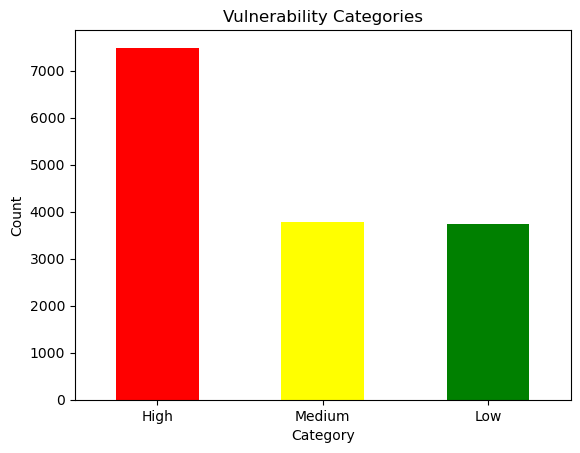

In [17]:
df = pd.read_excel('../model/BMMS_overview_vulnerability.xlsx')

# Simulating the 'Vulnerability Category' calculation, replace this with actual logic
df['Vulnerability Category'] = pd.cut(df['Vulnerability Score'], bins=[0, 0.01, 0.02, 1], 
                                      labels=['High', 'Medium', 'Low'], right=False)

# Count the occurrences of each category
vulnerability_counts = df['Vulnerability Category'].value_counts()

# Plot a bar chart
fig, ax = plt.subplots()
vulnerability_counts.plot(kind='bar', color=['red', 'yellow', 'green'], ax=ax)

# Add title and labels
ax.set_title('Vulnerability Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.xticks(rotation=0)  # Keep the category names horizontal for readability

# Save the plot as an image file
plt.savefig('vulnerability_categories_plot.png')

# Display the plot
plt.show()


### Plot Vulnerable Roads

# Pick top 10 most vulnerable roads

In [28]:
top_vul_bridges = bmms_data.sort_values(by='Vulnerability Score', ascending=True)
top_10_vul_bridges = top_vul_bridges.head(10)

In [33]:
print(top_10_vul_bridges[['road','zone','Vulnerability Score','Vulnerability Category','lat','lon']])

     road     zone  Vulnerability Score Vulnerability Category        lat  \
1375   N5  Rangpur             0.000912                   High  26.470854   
1386   N5  Rangpur             0.000912                   High  26.490065   
1685   N7   Khulna             0.000986                   High  22.584295   
1694   N7   Khulna             0.000987                   High  22.543995   
1344   N5  Rangpur             0.000989                   High  26.276786   
1326   N5  Rangpur             0.000998                   High  26.133779   
1350   N5  Rangpur             0.001001                   High  26.321240   
1309   N5  Rangpur             0.001014                   High  26.018504   
1345   N5  Rangpur             0.001016                   High  26.294632   
1310   N5  Rangpur             0.001028                   High  26.025764   

            lon  
1375  88.474124  
1386  88.371570  
1685  89.626822  
1694  89.590096  
1344  88.559073  
1326  88.536359  
1350  88.553573  
1309  88

In [36]:
vul_bridges = top_vul_bridges[['road','zone','Vulnerability Score','Vulnerability Category','lat','lon']]

In [37]:
#save vul_bridges to csv
vul_bridges.to_csv('../model/vul_bridges.csv', index=False)